In [ ]:
# Step 1: Upload and Read Data

from google.colab import files

uploaded = files.upload()

Saving all.csv to all.csv


<ipython-input-2-5b24ced661aa>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['TS'], dayfirst=True)


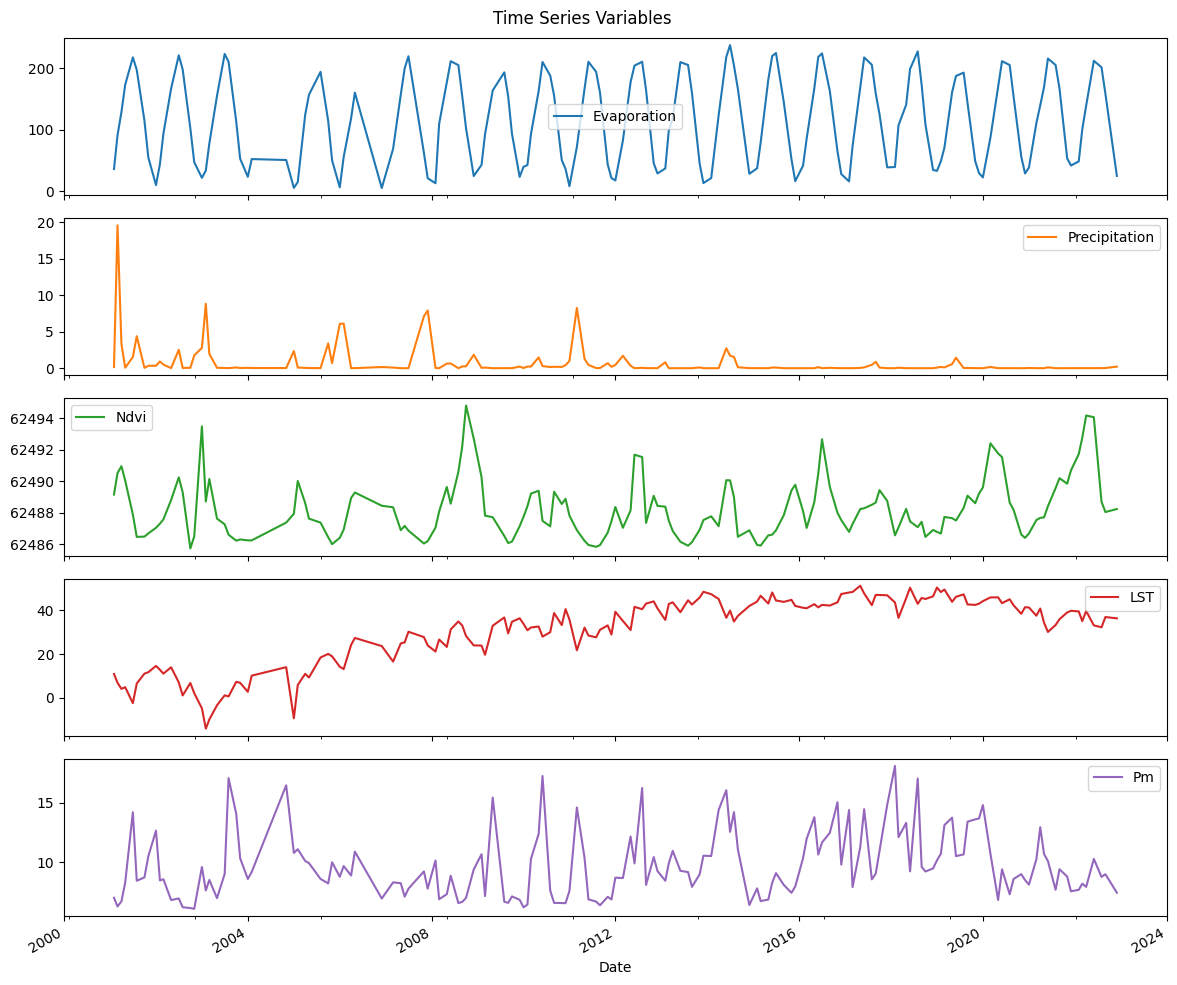

ADF Test Results:
Evaporation: p-value = 0.00394 → Stationary
Precipitation: p-value = 0.00000 → Stationary
Ndvi: p-value = 0.00000 → Stationary
LST: p-value = 0.26809 → Non-stationary
Pm: p-value = 0.00000 → Stationary


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Lag Order Selection:
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        15.31      15.41*   4.463e+06       15.35
1        14.91       15.51   3.002e+06       15.16
2        14.74       15.83   2.528e+06       15.18
3        14.39       15.97   1.789e+06      15.03*
4        14.29       16.36   1.617e+06       15.13
5        14.30       16.86   1.649e+06       15.34
6        14.30       17.36   1.666e+06       15.54
7        14.19       17.74   1.523e+06       15.63
8       14.14*       18.19  1.484e+06*       15.79
9        14.14       18.68   1.527e+06       15.99
10       14.27       19.30   1.802e+06       16.32
--------------------------------------------------


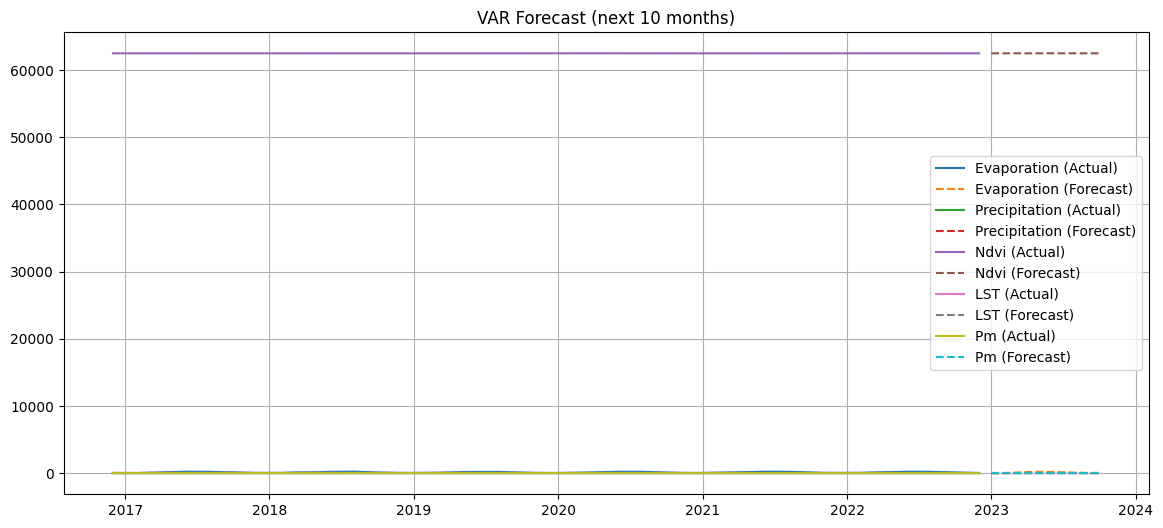

In [ ]:


import pandas as pd
df = pd.read_csv('all.csv')

# Step 2: Clean and Preprocess
df['Ndvi'] = df['Ndvi'].str.replace(',', '').astype(float)
df['LST'] = df['LST  '].astype(float)
df['Pm'] = pd.to_numeric(df['Pm'], errors='coerce')
df['Date'] = pd.to_datetime(df['TS'], dayfirst=True)
df.set_index('Date', inplace=True)

# Keep relevant variables
df = df[['Evaporation', 'Precipitation', 'Ndvi', 'LST', 'Pm']]
df.dropna(inplace=True)

# Optional: plot to visualize
import matplotlib.pyplot as plt
df.plot(subplots=True, figsize=(12, 10), title='Time Series Variables')
plt.tight_layout()
plt.show()

# Step 3: Check for stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name):
    result = adfuller(series)
    print(f'{name}: p-value = {result[1]:.5f} → {"Stationary" if result[1] < 0.05 else "Non-stationary"}')

print("ADF Test Results:")
for column in df.columns:
    adf_test(df[column], column)

# Step 4: Differencing if needed
df_diff = df.diff().dropna()

# Step 5: Fit VAR Model
from statsmodels.tsa.api import VAR

model = VAR(df_diff)
lag_selection = model.select_order(maxlags=10)
print("Lag Order Selection:")
print(lag_selection.summary())

selected_lag = lag_selection.selected_orders['aic']
model_fitted = model.fit(selected_lag)

# Step 6: Forecasting
forecast_steps = 10
forecast = model_fitted.forecast(df_diff.values[-selected_lag:], steps=forecast_steps)

forecast_df = pd.DataFrame(forecast, columns=df.columns)
forecast_df.index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='MS')[1:]

# Optional: reverse differencing for interpretation
last_row = df.iloc[-1]
forecast_level = forecast_df.cumsum() + last_row

# Step 7: Plot Forecast
plt.figure(figsize=(14, 6))
for col in df.columns:
    plt.plot(df.index[-50:], df[col].iloc[-50:], label=f'{col} (Actual)')
    plt.plot(forecast_level.index, forecast_level[col], '--', label=f'{col} (Forecast)')
plt.title("VAR Forecast (next 10 months)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("📅 Forecast Table (Next 10 Periods):")
display(forecast_level.round(2))  # برای چاپ مرتب با دو رقم اعشار

# یا فقط اگر Pandas نمایش نداره، از:
# print(forecast_level.head(10).round(2).to_string())

📅 Forecast Table (Next 10 Periods):


,Evaporation,Precipitation,Ndvi,LST,Pm
2023-01-01,-16.98,0.92,62488.72,33.99,7.52
2023-02-01,-1.14,0.49,62488.49,36.18,6.36
2023-03-01,62.94,-0.42,62488.97,36.39,7.64
2023-04-01,160.86,-0.99,62489.88,37.89,7.44
2023-05-01,205.51,-0.26,62490.96,37.35,9.31
2023-06-01,184.71,-0.21,62491.59,35.23,8.35
2023-07-01,128.17,-0.50,62490.97,35.25,7.90
2023-08-01,62.77,-0.36,62490.71,35.53,7.57
2023-09-01,19.90,-0.08,62490.47,35.50,7.75
2023-10-01,22.57,0.02,62490.15,36.26,8.72


from matplotlib import pyplot as plt
_df_0['Evaporation'].plot(kind='hist', bins=20, title='Evaporation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Precipitation'].plot(kind='hist', bins=20, title='Precipitation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Ndvi'].plot(kind='hist', bins=20, title='Ndvi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['LST'].plot(kind='hist', bins=20, title='LST')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Evaporation', y='Precipitation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Precipitation', y='Ndvi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Ndvi', y='LST', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='LST', y='Pm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Evaporation'].plot(kind='line', figsize=(8, 4), title='Evaporation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Precipitation'].plot(kind='line', figsize=(8, 4), title='Precipitation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Ndvi'].plot(kind='line', figsize=(8, 4), title='Ndvi')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['LST'].plot(kind='line', figsize=(8, 4), title='LST')
plt.gca().spines[['top', 'right']].set_visible(False)